This is all of the code base and modified for VGG16 CNN. inside of the 'patoolib.extract_archive' insert the  dataset you want to work with it should be a zip file located in google drive.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 3.5 MB/s eta 0:00:00
Mounted at /content/drive
patool: Extracting /content/drive/MyDrive/Hood College/archive.zip ...
patool: running /usr/bin/7z x -o/content/extracted_images -- "/content/drive/MyDrive/Hood College/archive.zip"
patool: ... /content/drive/MyDrive/Hood College/archive.zip extracted to `/content/extracted_images'.
Found 20000 files belonging to 10 classes.
Using 14000 files for training.
Found 20000 files belonging to 10 classes.
Using 6000 files for validation.
Train Dataset - Image batch shape: (32, 224, 224, 3)
Train Dataset - Label batch shape: (32, 10)
Validation Dataset - Image batch shape: (32, 224, 224, 3)
Validation Dataset - Label batch shape: (32, 10)
Class Names: ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']
Number of classes: 10
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8389 - loss: 2.7722 - val_accuracy: 0.9892 - val_loss: 0.0200
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9611 - loss: 0.1872 - val_accuracy: 0.9898 - val_loss: 0.0148
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9680 - loss: 0.1968 - val_accuracy: 0.9925 - val_loss: 0.0163
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9710 - loss: 0.1732 - val_accuracy: 0.9917 - val_loss: 0.0122
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9772 - loss: 0.1319 - val_accuracy: 0.9900 - val_loss: 0.0157
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9729 - loss: 0.1971 - val_accuracy: 0.9900 - val_loss: 0.0135
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9780 - loss: 0.1247 - val_accuracy: 0.9900 - val_loss: 0.0125
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9762 - loss: 0.1591 - 

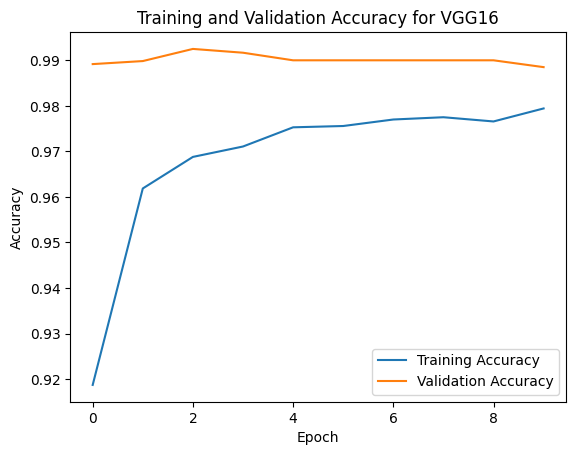

In [1]:
# libraries
!pip install patool==1.12
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from google.colab import drive
import patoolib

# Mount Google Drive
drive.mount('/content/drive')
patoolib.extract_archive(, outdir="/content/extracted_images")

# define the directory containing the dataset
data_dir = '/content/extracted_images/leapGestRecog'

# Load the dataset and split it into training and validation sets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,  #  30% for validation
    subset="training",
    seed=123,
    image_size=(224, 224),  #resize images to 224x224 pixels (VGG16 input size)
    batch_size=32,
    label_mode='categorical'  # use categorical labels (one-hot encoded)
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,  # Path to the main dataset directory
    validation_split=0.3,  # reserve 30% for validation
    subset="validation",  # use "validation" for the validation set
    seed=123,  # seed for reproducibility
    image_size=(224, 224),  # resize images to 224x224 pixels (VGG16 input size)
    batch_size=32,  # load images in batches of 32
    label_mode='categorical'  # use categorical labels (one-hot encoded)
)

# was having issues with the shape when runnign the model (Check the shape of the datasets)
for images, labels in train_dataset.take(1):
    print("Train Dataset - Image batch shape:", images.shape)
    print("Train Dataset - Label batch shape:", labels.shape)

for images, labels in validation_dataset.take(1):
    print("Validation Dataset - Image batch shape:", images.shape)
    print("Validation Dataset - Label batch shape:", labels.shape)

# class names to verify labels in terminal
class_names = train_dataset.class_names
print("Class Names:", class_names)
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")

# Load the pre-trained VGG16 model with custom layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the layers in the base model

# Add custom layers on top of VGG16
model = models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

# train the VGG16 model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10  # Adjust the number of epochs based on the accuracy wanted higher  epoches will give model more time to train
)

# evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_dataset, verbose=2)
print(f"Validation accuracy: {val_acc:.4f}")

# plot data from the model
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy for VGG16')
plt.show()


This is for the data augmentation code for the VGG16 base model (insert them above train dataset function to test)

In [ ]:
# Set up separate data augmentation techniques in the base model you should be able to insert these directly :) if not let me know plz
# Uncomment one at a time to test rotation, flipping, and scaling separately

# # 1. rotation Only
# data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
#     validation_split=0.3,  # Reserve 30% of the dataset for validation
#     rotation_range=20,     # Rotate images by up to 20 degrees
#     rescale=1./255         # Scale images to [0, 1] range
# )

# 2. flipping Only
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.3,  # Reserve 30% of the dataset for validation
    horizontal_flip=True,  # Randomly flip images horizontally
    rescale=1./255         # Scale images to [0, 1] range
 )

# 3. scaling Only
# data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
#     validation_split=0.3,  # Reserve 30% of the dataset for validation
#     zoom_range=0.2,        # Zoom in/out by up to 20%
#     rescale=1./255         # Scale images to [0, 1] range
# )


This is the code for testing the different learning rates on this model should return report of the model, graphs, F1 score etc for each rate.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 20000 files belonging to 10 classes.
Using 14000 files for training.
Found 20000 files belonging to 10 classes.
Using 6000 files for validation.
Class Names: ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']
Number of classes: 10

Training with Learning Rate = 0.01

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.5872 - loss: 25.4720 - val_accuracy: 0.8222 - val_loss: 0.5023
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.6315 - loss: 1.1389 - val_accuracy: 0.8260 - val_loss: 0.4543
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.6421 - loss: 1.1271 - val_accuracy: 0.8823 - val_loss: 0.3999
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.6343 - loss: 1.2100 - val_accuracy: 0.7698 - val_loss: 0.9537
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 

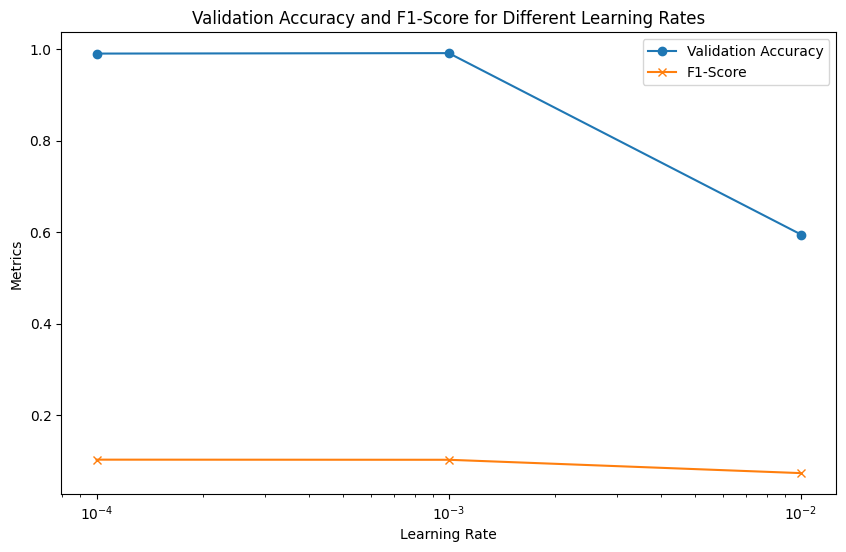

In [2]:
# Import necessary libraries
!pip install patool==1.12
!pip install scikit-learn
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from google.colab import drive
import patoolib

# Mount Google Drive
drive.mount('/content/drive')

# define the directory containing the dataset
data_dir = '/content/extracted_images/leapGestRecog'

# load the dataset and split it into training and validation sets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

# display class names to verify labels
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Class Names: {class_names}")
print(f"Number of classes: {num_classes}")

# build and compile the VGG16 model with a given learning rate.
def build_and_compile_vgg16(lr, input_shape=(224, 224, 3), num_classes=num_classes):
    # load the pre-trained VGG16 model without the top layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the layers in the base model

    # Add custom layers on top of VGG16.
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    # compile the model with the specified learning rate.
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# learning rates to experiment with --------
learning_rates = [0.01, 0.001, 0.0001]

# dictionary to store the results for each learning rate
results_lr = {}

# train and evaluate the model for each learning rate
for lr in learning_rates:
    print(f"\nTraining with Learning Rate = {lr}\n")

    # Build and compile a new VGG16 model with the current learning rate
    vgg16_model = build_and_compile_vgg16(lr)

    # train the model
    history = vgg16_model.fit(
        train_dataset,
        validation_data=validation_dataset,
        epochs=10,
        verbose=1
    )

    # evaluate the model on the validation set
    val_loss, val_acc = vgg16_model.evaluate(validation_dataset, verbose=2)
    print(f"Validation accuracy for Learning Rate = {lr}: {val_acc:.4f}")

    # calculate precision, recall, and F1 score
    val_predictions = vgg16_model.predict(validation_dataset)
    y_pred = np.argmax(val_predictions, axis=1)

    # true labels
    y_true = np.concatenate([np.argmax(y, axis=1) for x, y in validation_dataset], axis=0)

    # classification report
    print(f"\nClassification Report for Learning Rate = {lr}:")
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Store the results in a dictionary to review later
    results_lr[lr] = {
        'val_acc': val_acc,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score']
    }

# return validation accuracy and F1 score for each learning rate
print("\nValidation Accuracy and F1 Score for Different Learning Rates:")
for lr, metrics in results_lr.items():
    print(f"Learning Rate = {lr}: Validation Accuracy = {metrics['val_acc']:.4f}, Precision = {metrics['precision']:.4f}, Recall = {metrics['recall']:.4f}, F1-Score = {metrics['f1_score']:.4f}")

# plot the results
plt.figure(figsize=(10, 6))
plt.plot(list(results_lr.keys()), [metrics['val_acc'] for metrics in results_lr.values()], marker='o', label='Validation Accuracy')
plt.plot(list(results_lr.keys()), [metrics['f1_score'] for metrics in results_lr.values()], marker='x', label='F1-Score')
plt.xlabel('Learning Rate')
plt.ylabel('Metrics')
plt.title('Validation Accuracy and F1-Score for Different Learning Rates')
plt.xscale('log')
plt.legend()
plt.show()


In [ ]:
# Import necessary libraries
!pip install patool==1.12
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from google.colab import drive
import patoolib

# Mount Google Drive
drive.mount('/content/drive')
data_dir = '/content/extracted_images/leapGestRecog'

#  batch sizes to test
batch_sizes = [16, 32, 64, 128]  # define different batch sizes to test

#  store results  in a dictionary
results_batch_size = {}

# loop through each batch size and train the model
for batch_size in batch_sizes:
    print(f"\nTraining with Batch Size = {batch_size}\n")

    # Load the training and validation datasets with the new batch size
    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="training",
        seed=123,
        image_size=(224, 224),
        batch_size=batch_size,  #set new batch size here
        label_mode='categorical'
    )

    validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="validation",
        seed=123,
        image_size=(224, 224),
        batch_size=batch_size,  #set new batch size here
        label_mode='categorical'
    )

    # display class names to verify labels
    class_names = train_dataset.class_names
    print("Class Names:", class_names)
    num_classes = len(class_names)
    print(f"Number of classes: {num_classes}")

    # load the pre-trained VGG16 model with custom layers
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze the layers in the base model

    # add custom layers on top of VGG16
    model = models.Sequential([
        tf.keras.layers.Input(shape=(224, 224, 3)),  #  input shape layer
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')  # layer for the number of classes
    ])

    # compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Try to print the model summary to identify any shape-related issues (was struggling here for a long time)
    try:
        model.summary()
    except ValueError as e:
        print(f"Shape issue encountered: {e}")
        continue  # Skip this batch size if there is an error in the summary

    # train the  model
    history = model.fit(
        train_dataset,
        validation_data=validation_dataset,
        epochs=10,  # Adjust the number of epochs based on your requirements
        verbose=1
    )

    #evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(validation_dataset, verbose=2)
    print(f"Validation accuracy for Batch Size = {batch_size}: {val_acc:.4f}")

    # Store results for this batch size
    results_batch_size[batch_size] = val_acc

# Print out validation accuracy for each batch size
print("\nValidation accuracy for different batch sizes:")
for batch_size, acc in results_batch_size.items():
    print(f"Batch Size = {batch_size}: Validation Accuracy = {acc:.4f}")

# Plot validation accuracy for each batch size
plt.figure(figsize=(10, 6))
plt.plot(list(results_batch_size.keys()), list(results_batch_size.values()), marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Batch Sizes (VGG16)')
plt.show()


Different optimizers used started with adam then tested RMSprop all other models are trained on adam optimizer.

In [ ]:
#RMS
# Import necessary libraries
!pip install patool==1.12
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from google.colab import drive
import patoolib

# Mount Google Drive
drive.mount('/content/drive')

# define the directory containing the dataset
data_dir = '/content/extracted_images/leapGestRecog'

# load the dataset and split it into training and validation sets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="training",
    seed=123,  #
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'  # Use categorical labels (one-hot encoded)
)

# Check the shape of the datasets
for images, labels in train_dataset.take(1):
    print("Train Dataset - Image batch shape:", images.shape)
    print("Train Dataset - Label batch shape:", labels.shape)

for images, labels in validation_dataset.take(1):
    print("Validation Dataset - Image batch shape:", images.shape)
    print("Validation Dataset - Label batch shape:", labels.shape)

# Display class names to verify labels
class_names = train_dataset.class_names
print("Class Names:", class_names)
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")

# Load the pre-trained VGG16 model with custom layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the layers in the base model

# Add custom layers on top of VGG16
model = models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),  # Explicit input shape layer
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Output layer for the number of classes
])

# Compile the model with RMSprop optimizer
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# model summary
model.summary()

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_dataset, verbose=2)
print(f"Validation accuracy: {val_acc:.4f}")

# Plot data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy for VGG16 with RMSprop Optimizer')
plt.show()
